<a href="https://colab.research.google.com/github/Tanishi20079/RapportFoodoo_foodCategorization/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [3]:
data = sio.loadmat('/content/drive/MyDrive/CGAS_FoodCategorization/train_data25.mat')

X = data['X_train']
y = data['y_train']
#test = test_data['X_test']
#y_test = test_data['y_test']
len(X)

20389

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
########################################################################################################################
#_____________________________________________________Encoding the Data(Images to one hot encoding)___________________________________________ 
########################################################################################################################
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(y_train)
test_int_encoded = label_encoder.fit_transform(y_test)
int_encoded

array([12,  1, 11, ...,  0, 15,  8])

In [7]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
train_encoded = onehot_encoder.fit_transform(int_encoded)
print(train_encoded)
print("test encoded: ")
test_int_encoded = test_int_encoded.reshape(len(test_int_encoded), 1)
test_encoded = onehot_encoder.fit_transform(test_int_encoded)
print(test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
test encoded: 
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
########################################################################################################################
#________________________Creating the  BASE MOdel ANd Encapsulating it in Pretrained___________________________________#
########################################################################################################################

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(192, 192,3), include_top=False, weights="imagenet")

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

x=layers.Conv2D(128, (2,2), activation='relu', input_shape=(192,192, 3))(base_model.output)
x=layers.Conv2D(128, (1,1), activation='relu')(x)
x=layers.Conv2D(512, (1,1), activation='relu')(x)
x=layers.Conv2D(64, (1,1), activation='relu')(x)
x=layers.MaxPooling2D((1,1), strides=2)(x)
x=layers.Conv2D(32, (1,1), activation='relu')(x)
x=layers.MaxPooling2D((1,1), strides=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(23, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 198, 198, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 96, 96, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 96, 96, 64)   256         ['conv1_conv[0][0]']         

In [21]:
# from keras.callbacks import ModelCheckpoint
# np.random.seed(0)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(
#     filepath='CGAS_ResNet50.ckpt',
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

In [10]:
########################################################################################################################
#____________________________________________________________Training The Model___________________________________#
########################################################################################################################
hist=model.fit(X_train, train_encoded, batch_size=10, epochs=10, validation_data=(X_test, test_encoded))

Epoch 1/10
1632/1632 [==============================] - 405s 236ms/step - loss: 3.0944 - acc: 0.0917 - val_loss: 3.1119 - val_acc: 0.0907
Epoch 2/10
1632/1632 [==============================] - 393s 241ms/step - loss: 2.9889 - acc: 0.1276 - val_loss: 2.9572 - val_acc: 0.1285
Epoch 3/10
1632/1632 [==============================] - 379s 232ms/step - loss: 2.9377 - acc: 0.1331 - val_loss: 3.1030 - val_acc: 0.1241
Epoch 4/10
1632/1632 [==============================] - 379s 232ms/step - loss: 2.9206 - acc: 0.1368 - val_loss: 3.1383 - val_acc: 0.1045
Epoch 5/10
1632/1632 [==============================] - 379s 232ms/step - loss: 2.8856 - acc: 0.1414 - val_loss: 2.9505 - val_acc: 0.1329
Epoch 6/10
1632/1632 [==============================] - 378s 232ms/step - loss: 2.9102 - acc: 0.1394 - val_loss: 2.9020 - val_acc: 0.1403
Epoch 7/10
1632/1632 [==============================] - 378s 232ms/step - loss: 2.8679 - acc: 0.1471 - val_loss: 2.8316 - val_acc: 0.1545
Epoch 8/10
1632/1632 [============

In [11]:
# ########################################################################################################################
# #____________________________________________________________Saving The Model___________________________________#
# ########################################################################################################################

model.save("/content/drive/MyDrive/CGAS_FoodCategorization/resnet50_model.pb")
accuracy = model.evaluate(x=X_test,y=test_encoded,batch_size=256)
print("Test loss:",accuracy[0])
print("Test accuracy: ",accuracy[1])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CGAS_FoodCategorization/resnet50_model.pb/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


16/16 [==============================] - 24s 1s/step - loss: 2.8491 - acc: 0.1459
Test loss: 2.849104404449463
Test accuracy:  0.14590485394001007


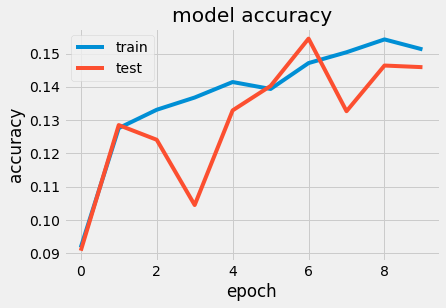

In [12]:
########################################################################################################################
#____________________________________________________________Accuracy Plot Of the MOdel___________________________________#
########################################################################################################################

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

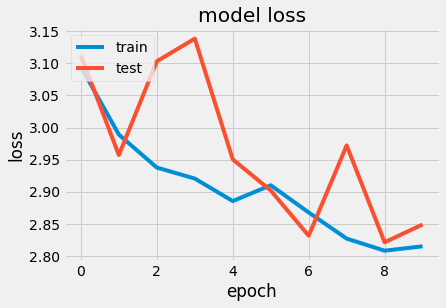

In [13]:
########################################################################################################################
#____________________________________________________________Loss Plot Of the Model___________________________________#
########################################################################################################################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()